# Introduction

**Objective**<br>
* Build model to predict video views based on statistical numbers and other attributes.

**About dataset**
* This dataset is obtained from [Trending YouTube Video Statistics | Kaggle](https://www.kaggle.com/datasnaek/youtube-new)

**Main Instructions**
* Exploratory analysis from the data, create some visualization to describe the data
* Describe the pre-processing steps, also the reason behind them
* Split the data into training and testing with optional portion
* Build the models with matching hyperparameter tune, choose the best model, also the reason behind that
* Test the model with data test

# Team

**Team Behind This Project**<br>
* As the project from Data Science in [Rakamin_Academy](https://rakamin.com/), this model was built from a team called **Hi5**<br>

**The Team Member**<br>
**1. Herdin Surya Dwi Putra**<br>
email: herdinsurya@gmail.com<br>
phone: +6281272243710<br>
Linkedin: www.linkedin.com/in/herdinsurya<br>

**2. Jomen Pardede (me)**<br>
email: jomenpardede@gmail.com<br>
phone: +6282272055285<br>
Linkedin: www.linkedin.com/in/jomen-pardede<br>

**3. Mia Maryasha**<br>
email: maryashamia@gmail.com<br>
phone: +6281285566246<br>
Linkedin: www.linkedin.com/in/mia-maryasha-738723173/<br>

**4. M. Jayus Abror**<br>
email: mhmdabror1994@gmail.com<br>
phone: +6282211101091<br>
Linkedin: www.linkedin.com/in/muhammad-abror-b42809119<br>

**5. Moh. Ardiansyah Gonti**<br>
email: @gmail.com<br>
phone: +6285717368356<br>
Linkedin: www.linkedin.com/in/mohammad-ardiansyah-gonti-266706110/<br>

**Our Friendly Mentor: Ade Irawan**<br>
email: @gmail.com<br>
phone: +6281906486000<br>
Linkedin: <br>


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.18.5
pandas version :  1.1.3
seaborn version :  0.11.0


In [2]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [3]:
data = pd.read_csv('youtube_statistics.csv', sep=';')
data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1.0,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327.0,33966.0,798.0,882.0,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15.0,920.0,81.0,2017-11-12
1,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25.0,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101.0,735.0,904.0,0.0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19.0,2232.0,58.0,2017-11-13
2,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24.0,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988.0,2011.0,243.0,149.0,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14.0,482.0,58.0,2017-11-12
3,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23.0,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680.0,70353.0,1624.0,2684.0,False,False,False,This video showcases the difference between pe...,20.0,263.0,30.0,2017-11-12
4,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24.0,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015.0,492.0,293.0,66.0,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11.0,753.0,88.0,2017-11-13


In [4]:
print('There are',str(len(data)), 'rows in this dataset')

There are 37924 rows in this dataset


## Describe Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37924 entries, 0 to 37923
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trending_date           37924 non-null  object 
 1   title                   37120 non-null  object 
 2   channel_title           37120 non-null  object 
 3   category_id             37120 non-null  float64
 4   publish_time            37120 non-null  object 
 5   tags                    36791 non-null  object 
 6   views                   36791 non-null  float64
 7   likes                   36791 non-null  float64
 8   dislikes                36791 non-null  float64
 9   comment_count           36791 non-null  float64
 10  comments_disabled       36791 non-null  object 
 11  ratings_disabled        36791 non-null  object 
 12  video_error_or_removed  36791 non-null  object 
 13  description             36791 non-null  object 
 14  No_tags                 36462 non-null

**Conclusion**</br>
* Dataframe have 18 columns
* Dataframe have 37924 rows
* Total categorical columns are 10 columns
* Total numerical columns are 8 columns
* `views` column is the target for this dataset

# Exploratory Data Analysis

## Statistical Summary

### Separation of Categorical and Numerical Data

In [6]:
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description','publish_date']
nums = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

### Statistical Numerical Data

In [7]:
data[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,37120.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36462.000000,36462.000000,36462.000000
mean,22.040760,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.962207,922.744556,70.554605
std,8.481936,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.823926,816.051836,22.451708
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,369.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1232.000000,91.000000
max,100.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


**Conclusion from Statistical Numerical Data**<br>

* The distribution of data for feature `views`, `likes`, `dislikes`, `comment_count`, `desc_len`, and `len_title` looks skewed *(mean & median are not close enough)*

### Statistical Categorical Data

In [8]:
data[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,37924,37120,37120,37120,36791,36791,36791,36791,36791,36462
unique,429,16466,1548,12494,12463,2,2,2,13992,219
top,\n,9,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17
freq,239,25,284,333,1120,35611,36034,36780,166,318


**Categorical Data Conclusion**</br>
* Data in `trending_date` has 429 unique values
* Data in `title` has 16466 unique values
* Data in `channel_title` has 1548 unique values
* Data in `publish_time` has 12494 unique values
* Data in `tags` has 12463 unique values
* Data in `comments_disabled` has 2 unique values with majority is False value
* Data in `ratings_disabled` has 2 unique values with majority is False value
* Data in `video_error_or_removed` has 2 unique values with majority is False value
* Data in `description` has 13992 unique values
* Data in `publish_date` has 219 unique values

## Pendekatan Grafis

### Univariate Analysis

In [9]:
# assign the numerical data into nums object
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)
data_num.head(3)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags',
       'desc_len', 'len_title'],
      dtype='object')

(37924, 8)


,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
0,1.0,1096327.0,33966.0,798.0,882.0,15.0,920.0,81.0
1,25.0,590101.0,735.0,904.0,0.0,19.0,2232.0,58.0
2,24.0,473988.0,2011.0,243.0,149.0,14.0,482.0,58.0


In [10]:
# assign the categorical data into cats object
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'publish_date'],
      dtype='object')

(37924, 10)


,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12
1,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13
2,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12


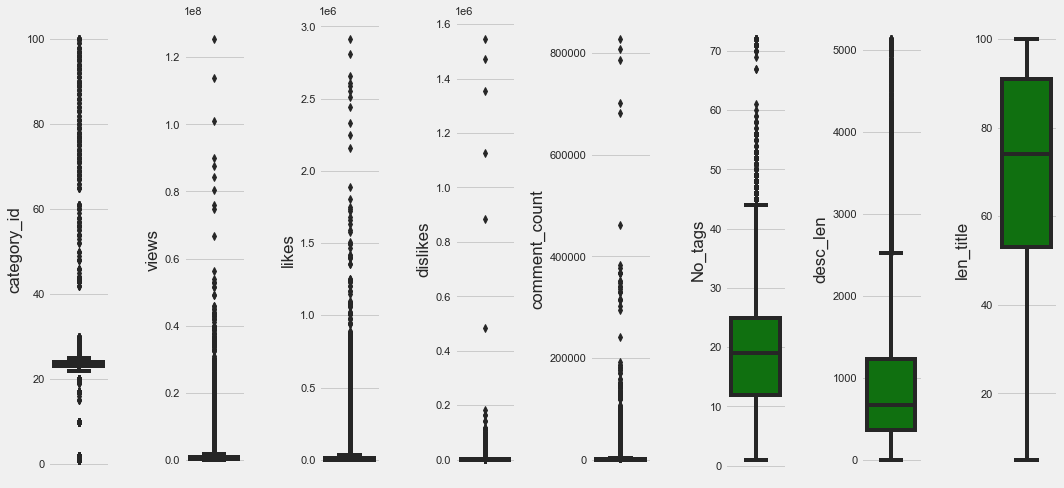

In [11]:
# look at the distribution of data with boxplot
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')
    plt.tight_layout()
plt.savefig('fig/boxplot.png')

It can be seen in the boxplot graph above that the `view`, `likes`, `dislikes`, `comment_count`, `o_tags`, and `desc_len` features have many outliers so that logarithmic transformations are needed for these features.

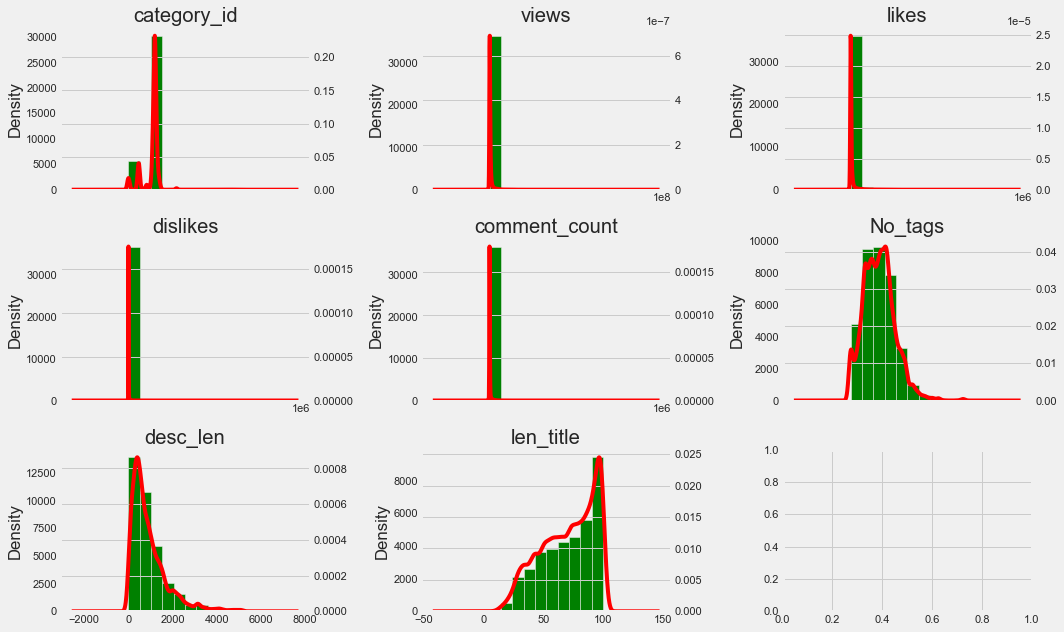

In [12]:
#View data distribution
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()
plt.savefig('fig/distribusi data.png')

In the data distribution of numerical features, it can be seen that there are several features that are positively skewed and `len_title` feature that is negatively skewed.

In [13]:
#Know the unique value of each categorical data
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'unik nilai']
data_cat_unique = data_cat_unique.sort_values('unik nilai', ascending=False)
data_cat_unique

,fitur,unik nilai
1,title,16466
8,description,13992
3,publish_time,12494
4,tags,12463
2,channel_title,1548
0,trending_date,429
9,publish_date,219
5,comments_disabled,2
6,ratings_disabled,2
7,video_error_or_removed,2


### Multivariate Analysis

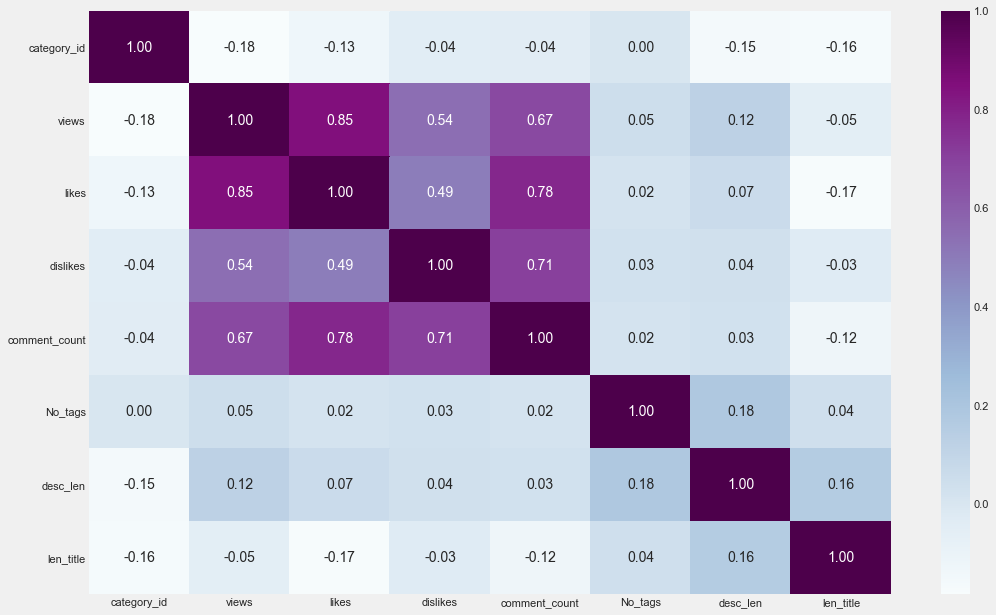

In [14]:
#create a correlation matrix from each numeric data
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
corr_= data[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")
plt.savefig('fig/heatmap.png');

There are 3 features that have a strong positive correlation to `views`, namely the `likes`, `dislikes`, and `comment_count` features

<Figure size 720x576 with 0 Axes>

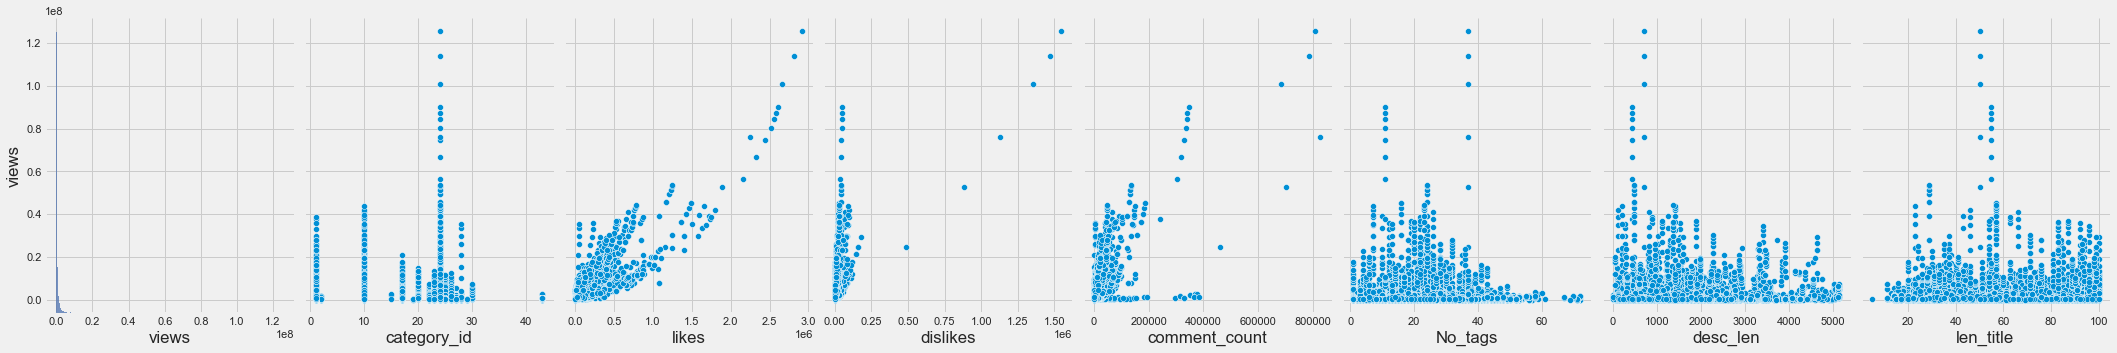

In [15]:
#create a pairplot chart from any numeric data
plt.figure(figsize=(10,8))
sns.pairplot(data=data, x_vars=['views','category_id','likes','dislikes','comment_count','No_tags','desc_len','len_title'], y_vars=['views'], height=5, aspect=0.75)
plt.savefig('fig/pairplot.png')

**Simple EDA**

**In some boxplot charts it can be seen that the data distribution is uneven and has lots of outliers and it can also be seen that the data distribution on the `No_Tags`, `Desc_len`, and `len_title` features is quite skewed.. </br>
</br>
Then when we look at the heatmap, we can see that there are several features that are positively correlated with the views of a video, such as `likes`, `dislikes`, `comment_count`, `No_tags`, and `desc_len`, so maybe some of these features are of feature importance for doing machine learning modeling**

# Data Preparation

In [16]:
# see the number of missing values from the data frame
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,trending_date,0
1,title,804
2,channel_title,804
3,category_id,804
4,publish_time,804
5,tags,1133
6,views,1133
7,likes,1133
8,dislikes,1133
9,comment_count,1133


In [17]:
# see the percentage of missing value for each feature
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,publish_date,1462,3.86
1,len_title,1462,3.86
2,desc_len,1462,3.86
3,No_tags,1462,3.86
4,comments_disabled,1133,2.99
5,description,1133,2.99
6,video_error_or_removed,1133,2.99
7,ratings_disabled,1133,2.99
8,comment_count,1133,2.99
9,dislikes,1133,2.99


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

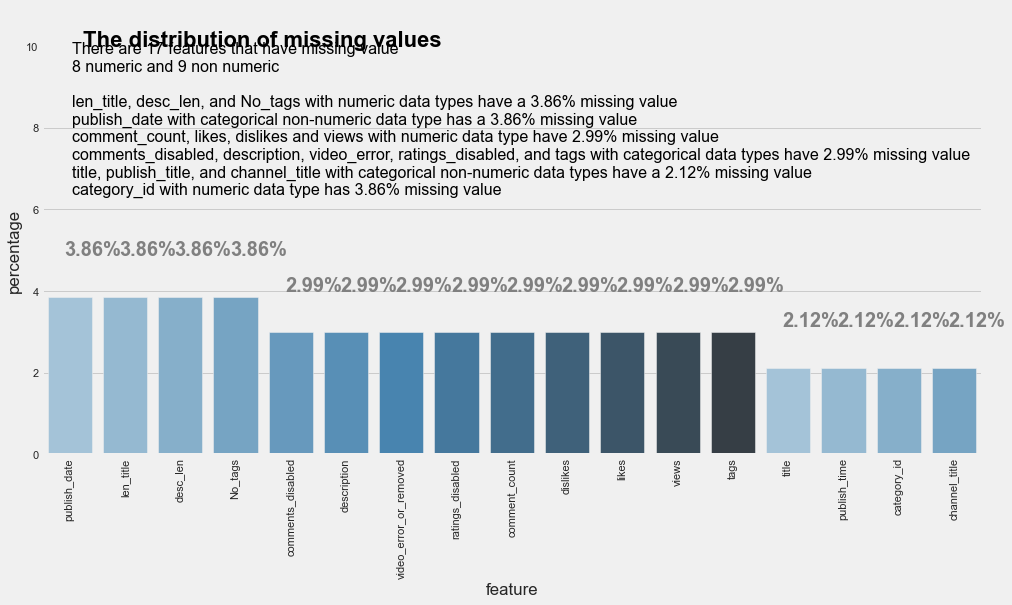

In [18]:
#View the distribution of missing values using the barplot
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+1, str(v)+'%', fontsize = 20, color='gray', fontweight='bold')
    
title = '''
The distribution of missing values'''
ax.text(0.25,10,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')    

text = '''
There are 17 features that have missing value
8 numeric and 9 non numeric

len_title, desc_len, and No_tags with numeric data types have a 3.86% missing value
publish_date with categorical non-numeric data type has a 3.86% missing value
comment_count, likes, dislikes and views with numeric data type have 2.99% missing value
comments_disabled, description, video_error, ratings_disabled, and tags with categorical data types have 2.99% missing value
title, publish_title, and channel_title with categorical non-numeric data types have a 2.12% missing value
category_id with numeric data type has 3.86% missing value

'''
ax.text(0.05,5.5,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')

ax.set_ylim(0,10)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout
#plt.savefig('fig/distribusi nilai hilang.png');

## Drop Column 

In [19]:
#drop category_id, publish_date, description, tags, title, channel_title
data_clean = data.drop(['publish_date','description','title','channel_title','tags','publish_time'], axis=1)

the `category_id`, `publish_date`, `description`, `tags`, `title`, `channel_title` features are removed because they have a very large number of unique values, so it is assumed that each row of data has a different value.

## Filling Missing Column with Mode

In [20]:
data_clean['comments_disabled'].value_counts()

False    35611
True      1180
Name: comments_disabled, dtype: int64

In [21]:
#fill in the comments_disabled value with mode
data_clean['comments_disabled'] = data_clean['comments_disabled'].fillna(data_clean['comments_disabled'].mode()[0])

In [22]:
data_clean['comments_disabled'].value_counts()

False    36744
True      1180
Name: comments_disabled, dtype: int64

In [23]:
data_clean['video_error_or_removed'].value_counts()

False    36780
True        11
Name: video_error_or_removed, dtype: int64

In [24]:
#fill in the video_error_or_removed value with mode
data_clean['video_error_or_removed'] = data_clean['video_error_or_removed'].fillna(data_clean['video_error_or_removed'].mode()[0])

In [25]:
data_clean['video_error_or_removed'].value_counts()

False    37913
True        11
Name: video_error_or_removed, dtype: int64

In [26]:
data_clean['ratings_disabled'].value_counts()

False    36034
True       757
Name: ratings_disabled, dtype: int64

In [27]:
#fill in the ratings_disabled value with mode
data_clean['ratings_disabled'] = data_clean['ratings_disabled'].fillna(data_clean['ratings_disabled'].mode()[0])

In [28]:
data_clean['ratings_disabled'].value_counts()

False    37167
True       757
Name: ratings_disabled, dtype: int64

## Filling Missing Column with Median

In [29]:
#fill in the missing value with median
data_clean.fillna(data_clean.median(), inplace=True)
data_clean.head(3)

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title
0,17.14.11,1.0,1096327.0,33966.0,798.0,882.0,False,False,False,15.0,920.0,81.0
1,17.14.11,25.0,590101.0,735.0,904.0,0.0,True,False,False,19.0,2232.0,58.0
2,17.14.11,24.0,473988.0,2011.0,243.0,149.0,False,False,False,14.0,482.0,58.0


In [30]:
data_clean.isnull().sum()

trending_date             0
category_id               0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
No_tags                   0
desc_len                  0
len_title                 0
dtype: int64

## Duplicate Values

In [31]:
#see the number of duplicate data
data_clean.duplicated().sum()

5067

In [32]:
#drop duplicate data
data_clean = data_clean.drop_duplicates()

In [33]:
#see the number of duplicate data
data_clean.duplicated().sum()

0

## Outliers

Text(0.5, 0, '')

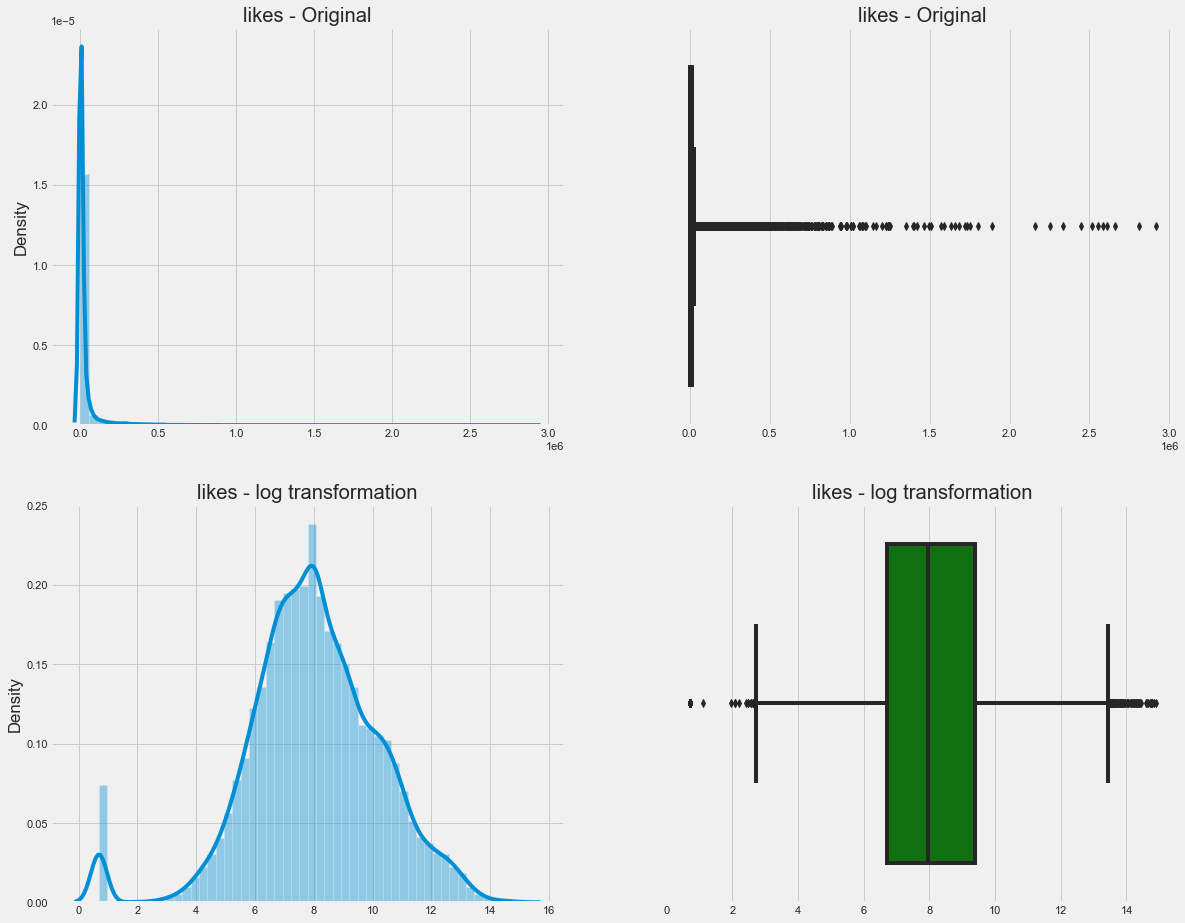

In [34]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['likes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('likes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['likes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('likes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['likes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('likes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['likes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('likes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

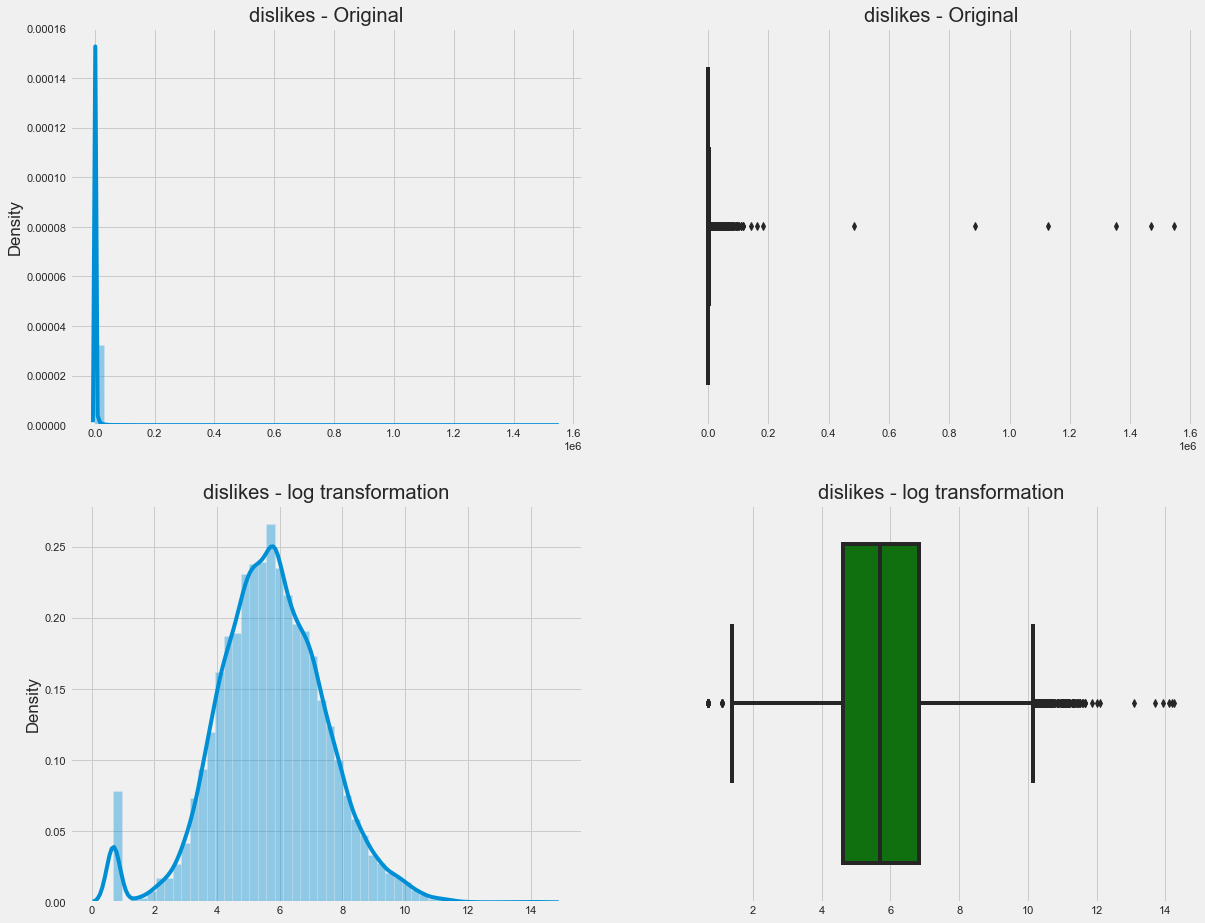

In [35]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['dislikes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('dislikes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['dislikes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('dislikes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['dislikes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('dislikes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['dislikes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('dislikes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

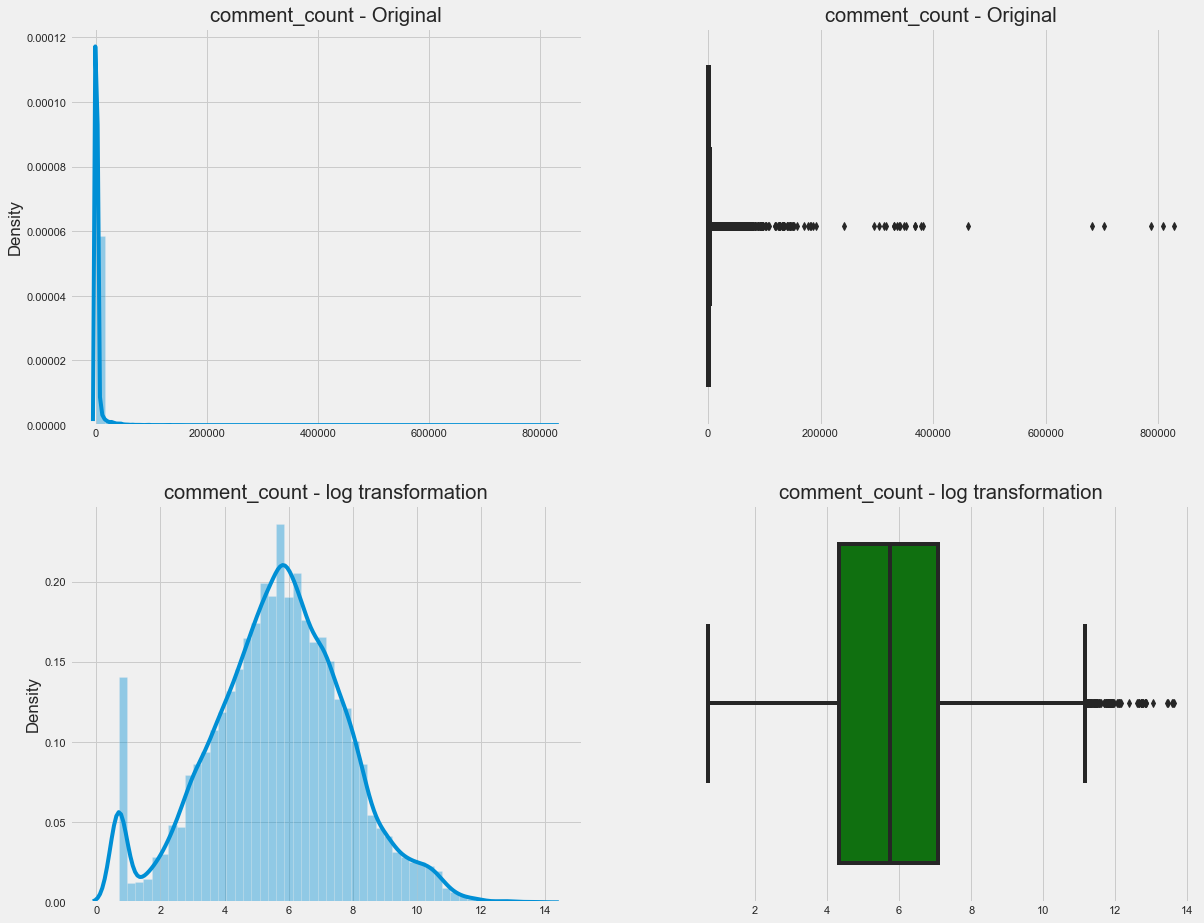

In [36]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['comment_count'],kde=True, ax=ax[0,0])
ax[0,0].set_title('comment_count - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['comment_count'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('comment_count - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['comment_count']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('comment_count - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['comment_count']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('comment_count - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

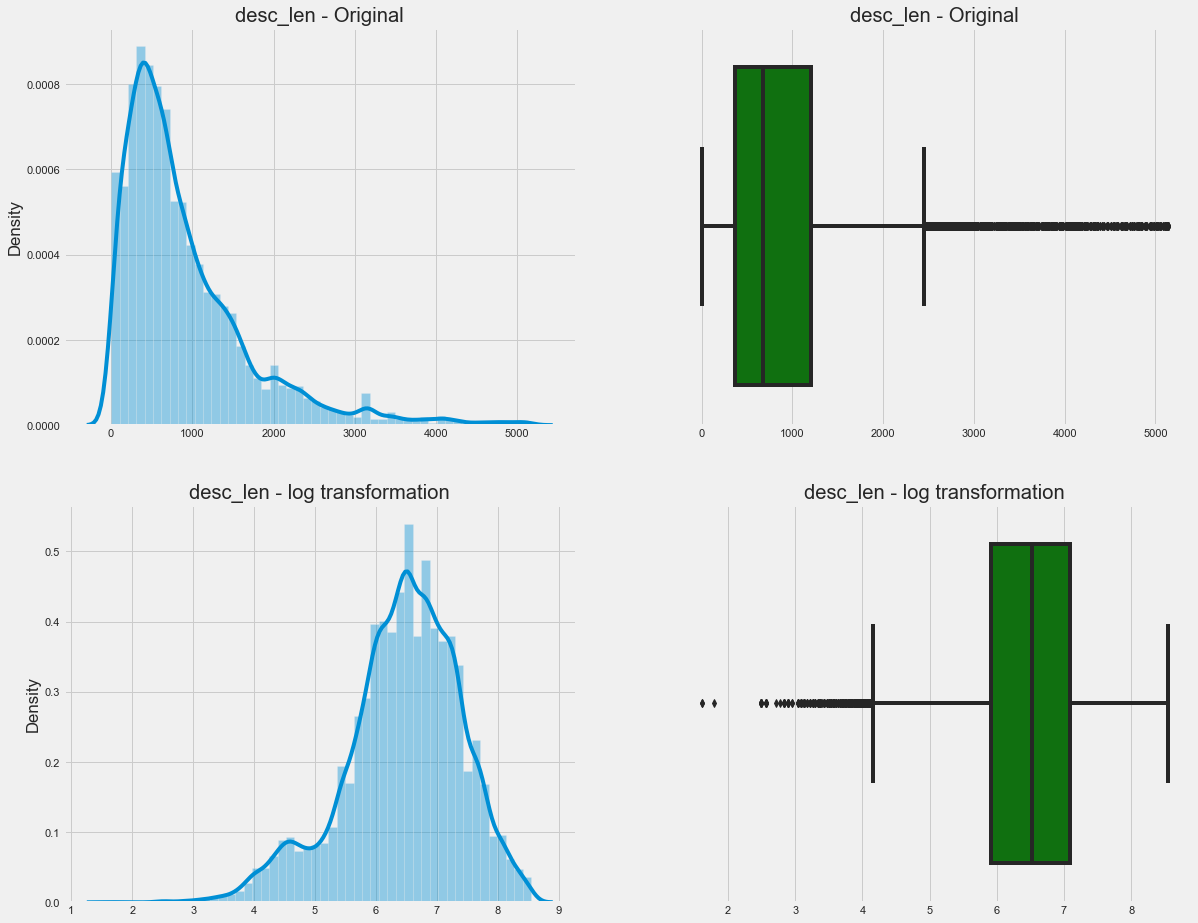

In [37]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['desc_len'],kde=True, ax=ax[0,0])
ax[0,0].set_title('desc_len - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['desc_len'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('desc_len - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['desc_len']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('desc_len - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['desc_len']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('desc_len - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

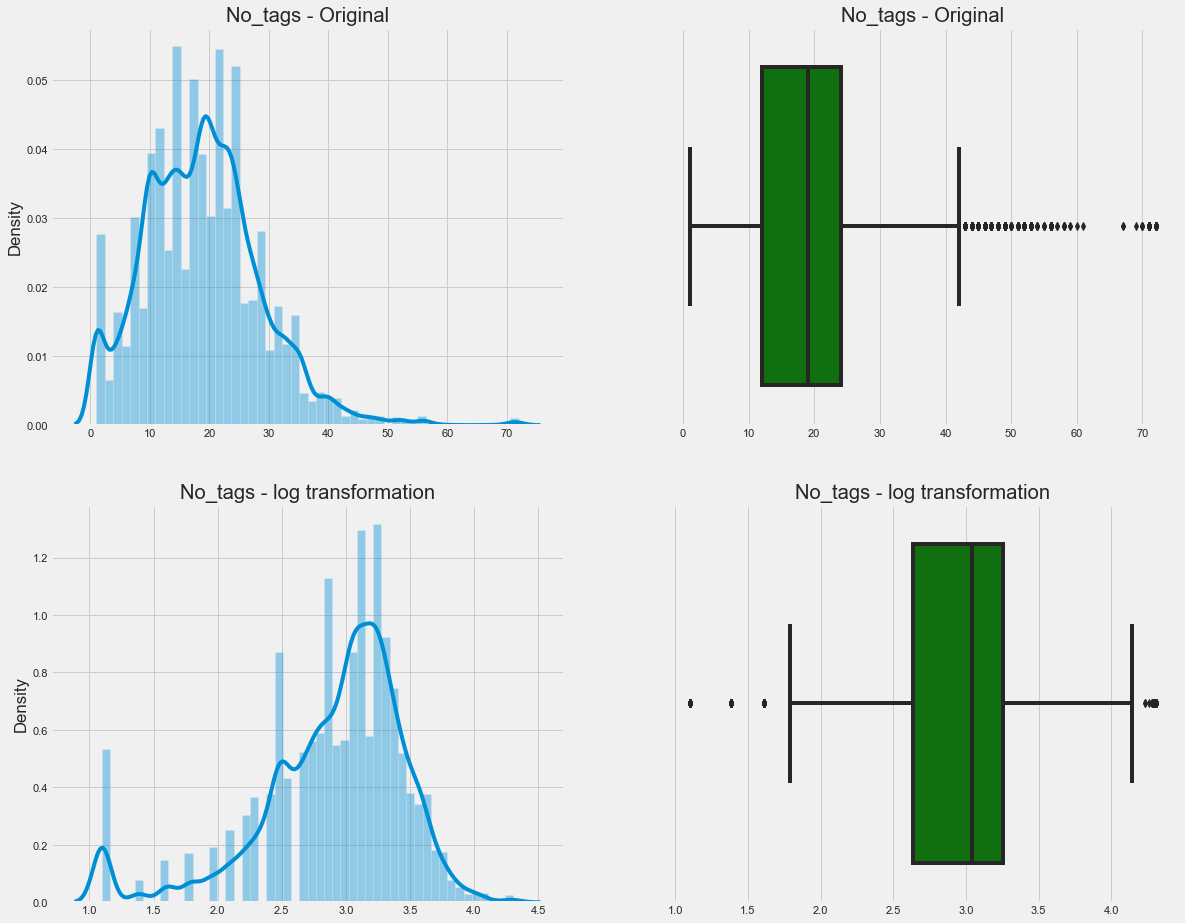

In [38]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['No_tags'],kde=True, ax=ax[0,0])
ax[0,0].set_title('No_tags - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['No_tags'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('No_tags - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['No_tags']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('No_tags - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['No_tags']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('No_tags - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

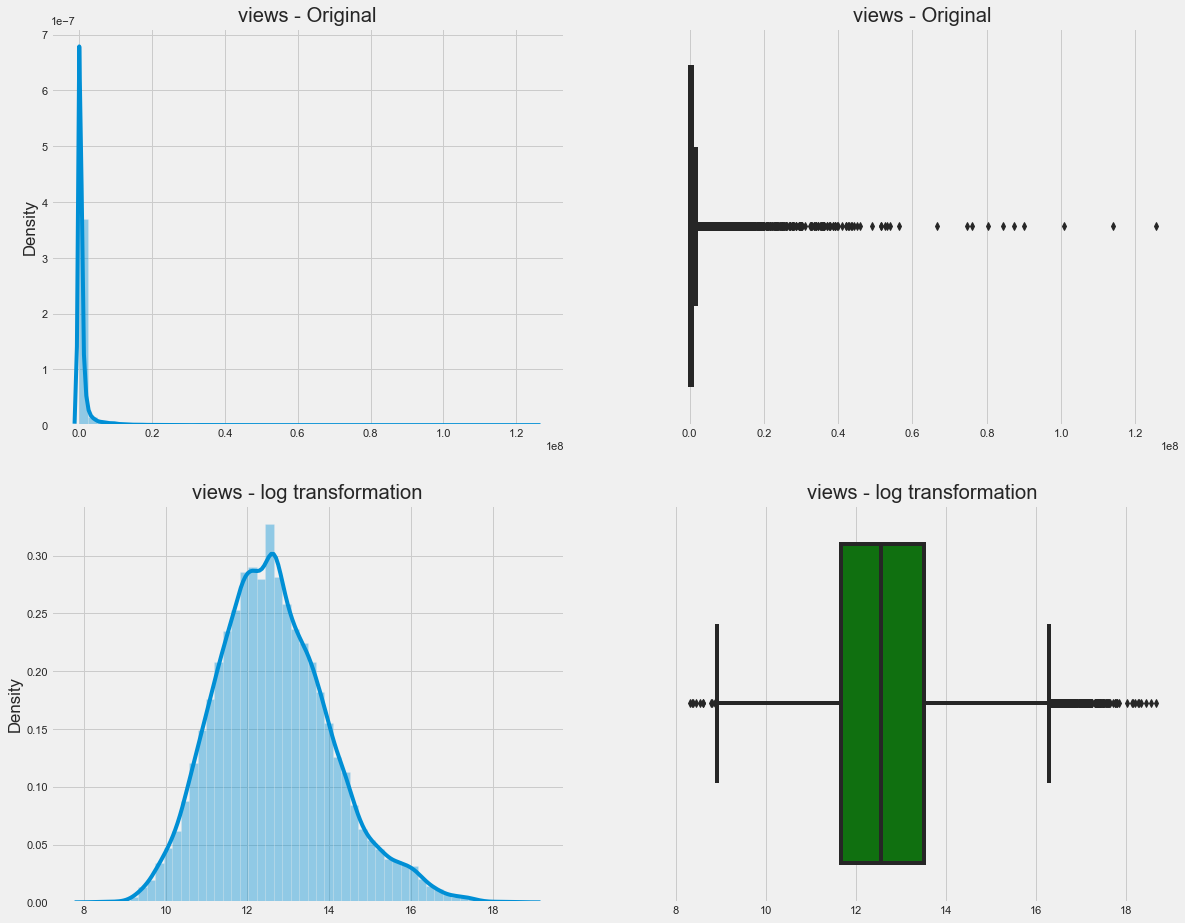

In [39]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['views'],kde=True, ax=ax[0,0])
ax[0,0].set_title('views - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['views'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('views - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['views']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('views - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['views']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('views - log transformation')
ax[1,1].set_xlabel('')

In [40]:
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

## Normalization

In [41]:
for var in features:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [42]:
data_clean.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,32857.000000,3.285700e+04,3.285700e+04,3.285700e+04,32857.000000,32857.000000,32857.000000,32857.000000
mean,21.860760,1.000813e+06,2.574948e+04,1.585416e+03,2541.689990,18.876039,908.471437,71.001978
std,7.534112,3.157975e+06,9.678774e+04,1.695483e+04,14820.416336,9.755309,801.275343,22.125862
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.152630e+05,8.090000e+02,1.000000e+02,75.000000,12.000000,370.000000,54.000000
50%,24.000000,2.825740e+05,2.878000e+03,2.990000e+02,313.000000,19.000000,677.000000,74.000000
75%,24.000000,7.323740e+05,1.209900e+04,9.340000e+02,1174.000000,24.000000,1202.000000,91.000000
max,100.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [43]:
df_pre.head()

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,...,log_desc_len,log_len_title,std_category_id,std_views,std_likes,std_dislikes,std_comment_count,std_No_tags,std_desc_len,std_len_title
0,17.14.11,1.0,1096327.0,33966.0,798.0,882.0,False,False,False,15.0,...,6.825460,4.406719,0.000000,0.008709,0.011661,0.000516,0.001066,0.197183,0.178648,0.800000
1,17.14.11,25.0,590101.0,735.0,904.0,0.0,True,False,False,19.0,...,7.711101,4.077537,0.242424,0.004673,0.000252,0.000585,0.000000,0.253521,0.434249,0.557895
2,17.14.11,24.0,473988.0,2011.0,243.0,149.0,False,False,False,14.0,...,6.180017,4.077537,0.232323,0.003747,0.000690,0.000157,0.000180,0.183099,0.093318,0.557895
3,17.14.11,23.0,1242680.0,70353.0,1624.0,2684.0,False,False,False,20.0,...,5.575949,3.433987,0.222222,0.009875,0.024154,0.001051,0.003243,0.267606,0.050653,0.263158
4,17.14.11,24.0,464015.0,492.0,293.0,66.0,False,False,False,11.0,...,6.625392,4.488636,0.232323,0.003667,0.000169,0.000190,0.000080,0.140845,0.146113,0.873684


**Data Preprocessing**

**we take several steps in preprocessing</br>**

**1. Dropping the `publish_date`, `publish_time`, `description`, `tags`, `title`, and `channel_title` features because these features have their own unique value for each existing video**</br>
**2. Then we fill in the features that have missing values by using the mode of the feature (the `comments_disabled`, `video_error_or_removed`, and `ratings_disabled` features. This is done because this feature has categorical data so it's better to use the fill with the values that appear the most frequently.**</br>
**3. Features with numerical data are filled in with the median value of each feature, we do this because the median value is more representative of the entire data distribution and is also more robust even though there are outliers.**</br>
**4. After filling in the missing values, we drop 5067 duplicated data rows**</br>
**5. The transformation log is carried out on features with numerical data values to convert them to normal / almost normal distributions, this is done because there are several features that have a skewed data distribution.**</br>
**6. Finally, we normalized so that the scale of each numeric feature has the same scale and it is hoped that it can simplify the process of learning the machine learning model data that we created..**</br>

# Split Train & Test

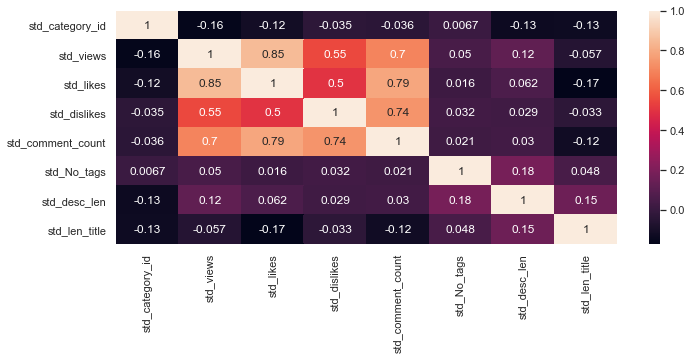

In [44]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['std_category_id','std_views','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']].corr(), annot=True)
plt.savefig('fig/split train test.png')

In [45]:
x = df_pre[['std_category_id','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']] 
y = df_pre['std_views']

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42) #Splitting the data into Train and Test

## Fit Model Simple Linear Regression

Fitting model to train set

In [47]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

## Predict

Predict the test set

In [48]:
pred = regressor.predict(xtest) #Predicting the views

In [49]:
np.exp(pred).round() # inverse log transform

array([1., 1., 1., ..., 1., 1., 1.])

## Evaluation

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [51]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [-0.01559644  0.63691344  0.54697938 -0.20826645  0.00397678  0.00672042
  0.00735905]
Intercept: 
 -0.0016772168949518197
MAE: 0.01
RMSE: 0.01
R2 score: 0.80


# Ridge

In [52]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [53]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept

eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

Coefficients: 
 [-0.01854754  0.56701253  0.28115236  0.00575934  0.00425653  0.00731014
  0.00703257]
Intercept: 
 -0.0007674009273035409
MAE: 0.01
RMSE: 0.01
R2 score: 0.79


## Randomized Search

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [55]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.02
R2 score: 0.22


# Lasso

In [56]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

Lasso()

In [57]:
pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


## Randomized Search

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda

hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [59]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


# Elastic Net

In [60]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

ElasticNet()

In [61]:
pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


## Randomized Search

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [63]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.01
R2 score: 0.80


# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.92


# Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.96


Text(0.5, 1.0, 'feature importance score')

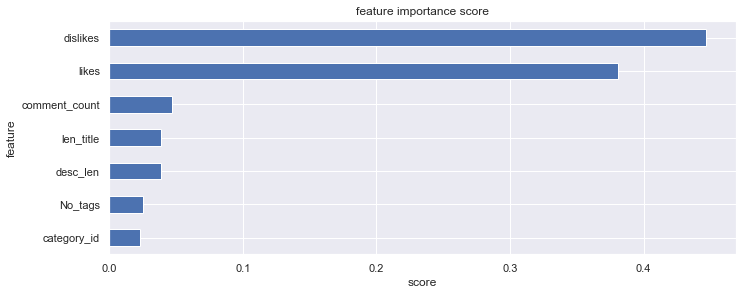

In [66]:
X=data[['category_id','likes','dislikes','comment_count','No_tags','desc_len','len_title']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# Support Vector Regressor

In [67]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.08
RMSE: 0.08
R2 score: -6.85


**The model's performance is very bad because the R2 value is below the 0 value, which is -6.85**

# Save Model

In [68]:
import pickle
pickle.dump(best_model1, open('RandomForest_model.pkl', 'wb'))

In [69]:
loaded_model = pickle.load(open('RandomForest_model.pkl', 'rb'))
result = loaded_model.score(xtest,ytest)
print(result)

0.9625847826134176


In [72]:
print('train accuracy : ', str(round(loaded_model.score(xtrain, ytrain)*100,2)), '%')
print('test accuracy : ', str(round(loaded_model.score(xtest, ytest)*100,2)), '%')

train accuracy :  99.38 %
test accuracy :  96.26 %


**The model we chose has very little tendency to overfitting, but we think it can be tolerated within normal reasonable limits, where the train accuracy has a value of 99,38% and the test accuracy has a value of 96,26%.**

# Conclusion

**Based on the experiments that have been carried out, there are several models that are good for determining the views of Youtube videos** </br>
**1. Random Forest with MAE 0.00, RMSE 0.01, and R2 of 0.96 makes Random Forest the best model so far**</br>
**2. Decision Tree is the second best sequence model after Random Forest with a slightly smaller R2 value of 0.92**</br>
**3. Elastic Net is the third best model with MAE 0.01, RMSE 0.01, and R2 0.80 values** </br>
**4. Ridge Regularization is the next best model with MAE values of 0.01, RMSE 0.01, and R2 of 0.79**</br>
**5. a very influential feature is the number of likes and dislikes of a video**